# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science

## Homework 4: Missing Data and Principal Component Analysis (PCA)


**Harvard University**<br/>
**Fall 2021**<br/>
**Instructors**: Pavlos Protopapas, Natesh Pillai

---

In [1]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

<a id="instructions"></a>

<hr style="height:2pt">

### INSTRUCTIONS


- To submit your assignment follow the instructions given in Canvas.

- Please **restart the kernel and run the entire notebook again before you submit.**

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code continues to work, restart the kernel and rerun your notebook periodically while working through this assignment. 

- We have tried to include all the libraries you may need to do the assignment in the imports cell provided below. **Please use only the libraries provided in those imports.**

- Please use `.head(...)` when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate and report $R^2$", do not just output the value from a cell. Write a `print(...)` function that clearly labels the output, includes a reference to the calculated value, and rounds it to a reasonable number of digits. **Do not hard code values in your printed output**. For example, this is an appropriate print statement:
```python
print(f'The R^2 is {R:.4f}')
```
- **Your plots MUST be clearly labeled and easy to read,** including clear labels for the $x$ and $y$ axes, a descriptive title ("MSE plot" is NOT a descriptive title; "95% confidence interval of coefficients for degree-5 polynomial model" on the other hand is descriptive), a legend when appropriate, and clearly formatted text and graphics.

- **Your code may also be evaluated for efficiency and clarity.** As a result, correct output is not always sufficient for full credit.

<hr style="height:2pt">

### Import Libraries

In [2]:
# RUN THIS CELL

# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer, KNNImputer

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

%matplotlib inline

<a id="contents"></a>

## Notebook contents

- [**PART 1 [55 pts]: Predicting the selling price of used cars**](#part1)
  - [Overview and Data Description](#part1intro)
  - [Question 1: Visualizing Missing Data [10 pts]](#part1q1)
      - [Solutions](#part1q1solution)
  - [Question 2: Imputation Methods [45 pts]](#part1q2)
      - [Solutions](#part1q2solution)


- [**PART 2 [45 pts]: Principal Componant Analysis**](#part2)
  - [Question 3: PCA for Regression [35 pts]](#part2q3)
      - [Solutions](#part2q3solution)
  - [Question 4: Visualizing Transformed Data [10 pts]](#part2q4)
      - [Solutions](#part2q4solution)


<a id="part1"></a>
    
# PART 1 [55 pts]: Predicting the selling price of used cars

[Return to contents](#contents)

<a id="part1intro"></a>

## Overview and Data Description 

[Return to contents](#contents)

In this part, we analyze the data about used cars from a [Kaggle project](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho). The dataset is pre-processed and modified so that it contains missing values. The goal is to handle missing data and predict selling prices from the other features available in this dataset.

### Dataset 

The training dataset is available as `data/vehicle_dataset_train.csv`. It contains the following columns:

- `year` - year of the car when it was bought, 
- `mileage` - mileage of the car,
- `max_power` - maximum power of the engine (in bhps),
- `selling_price` - price at which the car is being sold (in lakh rupees)

The testing dataset is available as `data/vehicle_dataset_test.csv`. It contains all columns mentioned above.


### Objective

We will handle missing data and predict `selling_price` from the other features available in this dataset.

<a id="part1q1"></a>

## <div class='exercise'><b>Question 1: Visualizing Missing Data [10 pts]</b></div>

[Return to contents](#contents)


**Load the dataset, inspect it, and answer the following questions:**


**1.1** How many columns and which ones include missing data in **X_train**? In each of those columns, how many observations are missing?

**1.2** Plot a boxplot of `year` for all samples that contain missing values. In the same plot, generate another boxplot of `year` for all samples that do not contain missing values. Do you see any pattern?  If so, what might be the implications of that pattern?
    
    
**PLEASE NOTE:** In this course, you will be expected to ALWAYS label your axes, title your graphs, and produce visuals which clearly communicate the data (as described in the [Instructions](#instructions) at the start of this notebook). Visuals should often be accompanied by text identifying the key point of the visual and defending any choices you make as a data scientist regarding the visual to best communicate your data.

<a id="part1q1solution"></a>
## Question 1: Solutions 

[Return to contents](#contents)

In [3]:
# Load the datasets
df_train = pd.read_csv("data/vehicle_dataset_train.csv", index_col=0)
df_test = pd.read_csv("data/vehicle_dataset_test.csv", index_col=0)
df_train.head(5)

,year,mileage,max_power,selling_price
6601,2015,17.40,117.30,70.0
504,2017,13.60,NaN,262.5
5812,2018,24.00,73.97,71.0
1443,2009,19.70,46.30,15.0
7453,2014,16.02,NaN,42.5


In [4]:
X_train, y_train = df_train.drop(columns=['selling_price']), df_train['selling_price']
X_test, y_test = df_test.drop(columns=['selling_price']), df_test['selling_price']

<div class='exercise-r'>

**1.1** How many columns and which ones include missing data in **X_train**? In each of those columns, how many observations are missing?
</div> 

In [5]:
# your code here
year_missing = X_train['year'].isna().sum()
mil_missing = X_train['mileage'].isna().sum()
maxpow_missing = X_train['max_power'].isna().sum()

print(f" Here is the amount missing from the Year column {year_missing}")
print(f" Here is the amount missing from the Mileage column {mil_missing}")
print(f" Here is the amount missing from the Max_power column {maxpow_missing}")

 Here is the amount missing from the Year column 0
 Here is the amount missing from the Mileage column 0
 Here is the amount missing from the Max_power column 44


<div class='exercise-r'>

**1.2** Generate a boxplot of `year` for all samples that have missing values. In the same plot, generate another boxplot of `year` for all samples that do not have missing values. Do you see any pattern?  If so, what might be the implications of that pattern? 

</div> 

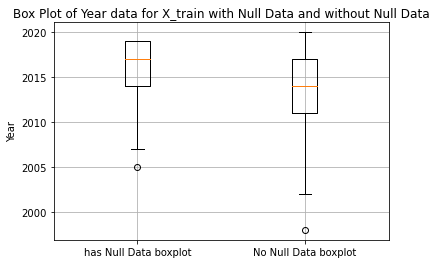

In [6]:
# your code here
null_data = X_train[X_train.isnull().any(axis=1)] #year samples with all null data in max_power
has_data = X_train[~X_train.isnull().any(axis=1)] # adding boolean operator to show the opposite
#print(len(has_data))

#boxplot = null_data.boxplot(column=['year'])
#boxplot = has_data.boxplot(column=['year'])
both = [null_data['year'], has_data['year']]
labels = ['has Null Data boxplot', "No Null Data boxplot"]
x = [1,2]

plt.figure()
plt.boxplot(both)
plt.xticks(x, labels)
plt.ylabel("Year")
plt.title("Box Plot of Year data for X_train with Null Data and without Null Data")
plt.grid()

**INTERPRETATION:**

**your answer here**
The boxplots are different for the dataframe that has all the rows with null data and the one that has no null data at all. The medians are different as well as the range and any outliers. The one without null data has a larger range and innerquartile range. This makes sense because there are more rows/observations in the dataframe  with no null data. The observations that has missing values look to be more recent and that can create more bias if we impute. This could potentially mean its Missing not at random

<a id="part1q2"></a>

## <div class='exercise'><b> Question 2:   Imputation Methods [45 pts]</b></div>

[Return to contents](#contents)

We will try different ways of dealing with missing data.

**2.1** First, we consider mean imputation:
  - Use SimpleImputer to impute the mean of observed `max_power` values in the training dataset for both **X_train** and **X_test**. 
  - Fit a linear regression model and a k-NN regression model ($k$=2) on the training data. 
  - Report the $R^2$ values on the testing data for each of your two fitted models.

**2.2** Now, we will impute the data using k-NN regression model and see how it works:
  - Use KNNImputer ($k$=2) to impute both **X_train** and **X_test**.
  - Fit a linear regression model and a k-NN regression model ($k$=2) on the training data. 
  - Report the $R^2$ values on the testing data for each of your two fitted models.

**2.3** Now, let's examine the indicator method:
  - For both the training and testing data, create an additional predictor called `has_missing_value` that indicates
   whether each row has any missing value. Impute the mean of observed `max_power` values in the training dataset for both **X_train** and **X_test**.
  - Fit a linear regression model and a k-NN regression model ($k$=2) on the training data. 
  - Report the $R^2$ values on the testing data for each of your two fitted models.


**2.4** Discuss your results by answering the following questions.  You should answer the questions directly in the provided markdown cells of your notebook.

- **2.4.1** Which method results in the largest $R^2$ value? Interpret your findings.

- **2.4.2** Compare the $R^2$ values in **2.1** and **2.3**. Does adding an indicator variable help? Do these indicator method results provide any support **for** or **against** a claim that the data is missing completely at random?  Why or why not?


<a id="part1q2solution"></a>
## Question 2: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>

    

**2.1** First, we consider mean imputation:
  - Use SimpleImputer to impute the mean of observed `max_power` values in the training dataset for both **X_train** and **X_test**. 
  - Fit a linear regression model and a k-NN regression model ($k$=2) on the training data. 
  - Report the $R^2$ values on the testing data for each of your two fitted models.

    
</div>

In [7]:
X_train, y_train = df_train.drop(columns=['selling_price']), df_train['selling_price']
X_test, y_test = df_test.drop(columns=['selling_price']), df_test['selling_price']

# need to scale before computing
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

# your code here
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_train = pd.DataFrame(X_train, columns = ['year', 'mileage', 'max_power'])

# Test values
X_test = imputer.transform(X_test)
X_test = pd.DataFrame(X_test, columns = ['year', 'mileage', 'max_power'])
X_test.head()

# Check that its updated
#maxpow_missing = X_test['max_power'].isna().sum()
#print(maxpow_missing)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test,y_pred_lr)


# Knn 
neighbors = KNeighborsRegressor(n_neighbors=2)   
neighbors.fit(X_train, y_train) 
y_pred_knn = neighbors.predict(X_test) 
r2_knn = r2_score(y_test,y_pred_knn)

print(f"Here is the R^2 score from the Linear Regression {r2_lr:.3f}")
print(f"Here is the R^2 score from the k-NN Regression {r2_knn:.3f}")


Here is the R^2 score from the Linear Regression 0.195
Here is the R^2 score from the k-NN Regression 0.248


<div class='exercise-r'>

**2.2** Now, we will impute the data using k-NN regression model and see how it works:
  - Use KNNImputer ($k$=2) to impute both **X_train** and **X_test**.
  - Fit a linear regression model and a k-NN regression model ($k$=2) on the training data. 
  - Report the $R^2$ values on the testing data for each of your two fitted models.
    
</div>

In [8]:
X_train, y_train = df_train.drop(columns=['selling_price']), df_train['selling_price']
X_test, y_test = df_test.drop(columns=['selling_price']), df_test['selling_price']

In [9]:
# your code here

# need to standardize before Knn
# need to scale before computing
#scaler = StandardScaler()
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)


imputer = KNNImputer(missing_values = np.nan, n_neighbors=2)
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_train = pd.DataFrame(X_train, columns = ['year', 'mileage', 'max_power'])

# Can use training data mean to impute on test bc we know the information is descriptive of this population
# recieved this intuition from Ed Discussion
X_test = imputer.transform(X_test)
X_test = pd.DataFrame(X_test, columns = ['year', 'mileage', 'max_power'])


# Check that its updated
#maxpow_missing = X_train['max_power'].isna().sum()
#print(maxpow_missing)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test,y_pred_lr)




# Knn 
neighbors = KNeighborsRegressor(n_neighbors=2)   
neighbors.fit(X_train, y_train) 
y_pred_knn = neighbors.predict(X_test) 
r2_knn = r2_score(y_test,y_pred_knn)

print(f"Here is the R^2 score from the Linear Regression {r2_lr:.3f}")
print(f"Here is the R^2 score from the k-NN Regression {r2_knn:.3f}")



Here is the R^2 score from the Linear Regression 0.206
Here is the R^2 score from the k-NN Regression 0.508


<div class='exercise-r'>

    
**2.3** Now, let's examine the indicator method:
  - For both the training and testing data, create an additional predictor called `has_missing_value` that indicates
   whether each row has any missing value. Impute the mean of observed `max_power` values in the training dataset for both **X_train** and **X_test**.
  - Fit a linear regression model and a k-NN regression model ($k$=2) on the training data. 
  - Report the $R^2$ values on the testing data for each of your two fitted models.
    
</div>

In [10]:
X_train, y_train = df_train.drop(columns=['selling_price']), df_train['selling_price']
X_test, y_test = df_test.drop(columns=['selling_price']), df_test['selling_price']

In [11]:
# your code here

# Creating Missingness value
cols = ['year','mileage','max_power']
df = X_train[cols].isnull().astype(int).add_suffix('_has_missing_value')
new_Xtrain = pd.concat([X_train, df], axis=1)

#create missingnessvalue
cols = ['year','mileage','max_power']
df1 = X_test[cols].isnull().astype(int).add_suffix('_has_missing_value')
new_Xtest = pd.concat([X_test, df1], axis=1)
#new_Xtest.head()


new_Xtrain = StandardScaler().fit_transform(new_Xtrain)
new_Xtest = StandardScaler().fit_transform(new_Xtest)

# impute
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(new_Xtrain) 
new_Xtrain = imputer.transform(new_Xtrain)
new_Xtrain = pd.DataFrame(new_Xtrain, columns = ['year', 'mileage', 'max_power','year_has_missing_value',\
                                                 'mileage_has_missing_value','max_power_has_missing_value'])

# Can use training data mean to impute on test bc we know the information is descriptive of this population
new_Xtest = imputer.transform(new_Xtest)
new_Xtest = pd.DataFrame(new_Xtest, columns = ['year', 'mileage', 'max_power','year_has_missing_value',\
                                                 'mileage_has_missing_value','max_power_has_missing_value'])

# Linear Regression
lr = LinearRegression()
lr.fit(new_Xtrain, y_train)
y_pred_lr = lr.predict(new_Xtest)
r2_lr = r2_score(y_test,y_pred_lr)


# Knn 
neighbors = KNeighborsRegressor(n_neighbors=2)   
neighbors.fit(new_Xtrain, y_train) 
y_pred_knn = neighbors.predict(new_Xtest) 
r2_knn = r2_score(y_test,y_pred_knn)

print(f"Here is the R^2 score from the Linear Regression {r2_lr:.3f}")
print(f"Here is the R^2 score from the k-NN Regression {r2_knn:.3f}")


Here is the R^2 score from the Linear Regression 0.430
Here is the R^2 score from the k-NN Regression 0.658


<div class='exercise-r'>
    

**2.4.1** Which method results in the largest $R^2$ value? Interpret your findings.

</div>

**your answer here**
The R^2 score from 2.3 gives the largest R^2 score. This R^2 gets computed using the missingness indicator and k-NN with 2 neighbors. This makes sense because k-NN looks at the nearest values and takes the mean of them to determine the model. The k-NN model now looks at the missingness indicator which can better describe why the data might be missing. 

<div class='exercise-r'>

**2.4.2** Compare the $R^2$ values in **2.1** and **2.3**. Does adding an indicator variable help? Do these indicator method results provide any support **for** or **against** a claim that the data is missing completely at random? Why or why not?
    
</div>

**your answer here**
From 2.1, I got the R^2 from the linear regression to be 0.195 and the k-NN to be 0.248. From 2.3,I got the R^2 from the linear regression to be 0.430 and the k-NN to be 0.658. Both of the models improve from what was done in 2.1, which uses the mean to impute and does not have the missingness indicator. The addition of the missingness indicator could help to reduce some of the bias that was in the data set that came from imputing the mean into the missing data. It can flag the model as to what was missing and how that affects the data. Since the addition of the missingness indicator improves the model, this provides support for the initial assumption made during the box plot that the data is not missing completely at random. I think it is closer it missing not at random because of the original pattern seen during the boxplot. 

<a id="part2"></a>
    
# PART 2 [45 pts]: Principal Component Analysis

[Return to contents](#contents)

<a id="part2q3"></a>

## <div class='exercise'><b> Question 3: PCA for Regression [35 pts]</b></div>

[Return to contents](#contents)
 

In this question, we will be using a dataset called "Communities and Crime" adapted from [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Communities+and+Crime). The modified dataset contains 122 predictor variables and 1 response variable. All numeric data was normalized into the decimal range 0.00-1.00. Some of the predictor variables are:

- `householdsize`: mean people per household
- `medIncome`: median household income
- `PctHousOccup`: percent of housing occupied
- `RentMedian`: rental housing - median rent
- `PolicReqPerOffic`: total requests for police per police officer

And the response variable is 

- `ViolentCrimesPerPop`: total number of violent crimes per 100K popuation



**Load the dataset, split it in training (80%) and test set (20%), inspect it, and answer the following questions:**


**3.1**  Compute the correlation matrix for the predictor variables in the training data (DO NOT print the entire matrix). Which pairs of distinct predictor variables have correlation greater than 0.99 or less than -0.99? (Output only those pairs with the corresponding correlation.)

**3.2** Fit a linear regression model on the training data **using all available predictors**. Report and interpret the $R^2$ value on the testing data.


**3.3** Now let's consider PCA for regression:
  - **3.3.1** Standardize both **X_train** and **X_test** and for each number of components $k$ in $k \in \{1,2,3,4,5,6,8,10,12,15,20\}$: 
  
      - Fit the PCA transformation with n_components = $k$ on the standardized **X_train**.
     
      - Apply the PCA transformation to the standardized **X_train**.   
      
     - Use scikit-learn's cross_validate(...) to perform a 10-fold cross validation for a linear regression model on the transformed training data. 
   
    Plot the mean validation MSE for each $k$. Report the best $k$ based on the mean validation MSE.
          
        
  - **3.3.2** Now let's compute the $R^2$ value on the testing data:
    - Fit the PCA transformation with n_components equals the best $k$ on the standardized **X_train**.
    - Apply the PCA transformation to both the standardized **X_train** and the standardized **X_test**. 
    - Fit a linear regression model to the PCA-transformed components and report the  test $R^2$.
    
**3.4** Compare the $R^2$ value obtained from **3.2** and **3.3.2**. Interpret the result.

In [12]:
# Load the datasets
df = pd.read_csv("data/communities_and_crime.csv", index_col = 0)
df.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,...,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.00,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,...,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.10,0.07,0.02,0.57,0.29,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,0.15,0.31,0.40,0.63,0.14,0.06,0.58,0.72,0.65,0.47,0.16,1.00,0.22,0.52,0.10,0.51,0.48,0.39,0.51,0.30,0.29,0.34,0.23,0.13,0.20,...,0.93,0.38,0.05,0.21,0.23,0.30,0.61,0.89,0.15,0.01,0.06,0.12,0.10,0.64,0.22,0.06,0.39,0.84,0.06,0.06,0.91,0.5,0.88,0.26,0.49
2,0.25,0.54,0.05,0.71,0.48,0.30,0.42,0.48,0.28,0.32,0.26,1.00,0.33,0.55,0.37,0.37,0.39,0.64,0.44,0.32,0.29,0.32,0.23,0.17,0.17,...,0.96,0.12,0.05,0.11,0.35,0.08,0.80,0.82,0.04,0.19,0.19,0.18,0.05,0.57,0.36,0.09,0.46,0.05,0.09,0.05,0.88,0.5,0.76,0.13,0.34
3,1.00,0.42,0.47,0.59,0.12,0.05,0.41,0.53,0.34,0.33,1.00,0.99,0.28,0.62,0.16,0.36,0.40,0.30,0.45,0.29,0.30,0.35,0.21,0.20,0.33,...,0.75,0.19,0.35,0.19,0.38,0.16,0.82,0.70,0.45,0.03,0.05,0.33,0.13,0.57,1.00,1.00,0.07,0.15,1.00,0.35,0.73,0.0,0.31,0.21,0.69
4,0.11,0.43,0.04,0.89,0.09,0.06,0.45,0.48,0.31,0.46,0.13,1.00,0.22,0.52,0.44,0.49,0.56,0.41,0.39,0.25,0.25,0.25,0.16,0.07,0.20,...,0.98,0.14,0.03,0.14,0.37,0.11,0.84,0.96,0.00,0.00,0.00,0.00,0.02,0.86,0.29,0.16,0.12,0.07,0.04,0.01,0.81,1.0,0.56,0.09,0.63


In [13]:
# Split the data into training and testing data
X,y = df.drop(columns=['ViolentCrimesPerPop']), df['ViolentCrimesPerPop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<a id="part2q3solution"></a>
## Question 3: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>

**3.1** Compute the correlation matrix for the predictor variables in the training data (DO NOT print the entire matrix). Which pairs of distinct predictor variables have correlation greater than 0.99 or less than -0.99? (Output only those pairs with the corresponding correlation.)
    
</div>

In [14]:
correlation = X_train.corr() # pandas 
verycorrelated = correlation[correlation > 0.99 ] # masking
notcorrelated = correlation[correlation < -0.99 ] # masking

d = []
index = np.where(verycorrelated.notnull())
x = index[0]
y = index[1]

for i in range(0, len(x)): # Need to check if they match 
    if verycorrelated.index[x[i]] == verycorrelated.columns[y[i]]: # make sure its not correlated with itself
        pass
    else:
        d.append((verycorrelated.index[x[i]], verycorrelated.columns[y[i]]))
                    

df = pd.DataFrame(d, columns=['First Predictor', 'Second Predictor'])
df2 = df.drop(labels = [1,2,6,5,7,11,13,15], axis = 0) # drop duplicates
print(f"Here is the list of distinct variable predictors that have a correlation greater than 0.99")
df2 # unique values

Here is the list of distinct variable predictors that have a correlation greater than 0.99


,First Predictor,Second Predictor
0,population,numbUrban
3,PctRecImmig5,PctRecentImmig
4,PctRecImmig5,PctRecImmig8
8,PctRecImmig10,PctRecImmig5
9,PctRecImmig10,PctRecImmig8
10,OwnOccLowQuart,OwnOccMedVal
12,RentMedian,MedRent
14,LemasSwFTPerPop,PolicPerPop


In [15]:
d2 = []
index = np.where(notcorrelated.notnull())
x = index[0]
y = index[1]



for i in range(0, len(x)): # Need to check if they match 
    if notcorrelated.index[x[i]] == notcorrelated.columns[y[i]]:
        pass
    else:
        d2.append((notcorrelated.index[x[i]], notcorrelated.columns[y[i]]))
df2 = pd.DataFrame(d2, columns=['First Predictor', 'Second Predictor'])
df2 = df2.drop(labels = [1], axis = 0)
print(f"Here is the list of distinct variable predictors that have a correlation less than -0.99")
df2

Here is the list of distinct variable predictors that have a correlation less than -0.99


,First Predictor,Second Predictor
0,LemasSwornFT,LemasSwFTFieldOps


<div class='exercise-r'>

**3.2** Fit a linear regression model on the training data **using all available predictors**. Report and interpret the $R^2$ value on the testing data.
    
</div>

In [16]:
# your code here
# Linear Regression
# need to scale before computing
xtrain = StandardScaler().fit_transform(X_train)
xtest = StandardScaler().fit_transform(X_test)

lr = LinearRegression()
lr.fit(xtrain, y_train)
y_pred = lr.predict(xtest)
r2 = r2_score(y_test,y_pred)

print(f"Here is the R^2 score from using a Linear Regression on the training data using all \
available predictors: {r2:.3f}")


Here is the R^2 score from using a Linear Regression on the training data using all available predictors: 0.201


**INTERPRETATION:**

**your answer here**
This is a very low R^2 score meaning that this is a pretty bad model to pick. It doesn't seem to describe the dataset very well. 

<div class='exercise-r'>


**3.3.1** Standardize both **X_train** and **X_test**,  and for each number of components $k$ in $k \in \{1,2,3,4,5,6,8,10,12,15,20\}$: 

  - Fit the PCA transformation with n_components = $k$ on the standardized **X_train**.
    
  - Apply the PCA transformation to the standardized **X_train**.
    
  - Use scikit-learn's cross_validate(...) to perform a 10-fold cross validation for a linear regression model on the transformed training data. 
    
  Plot the mean validation MSE for each $k$. Report the best $k$ based on the mean validation MSE.
    
</div>

Here is the k value that gives the lowest mse value from the cross validation 8 with value of 0.0297


Text(0, 0.5, 'MSE Values')

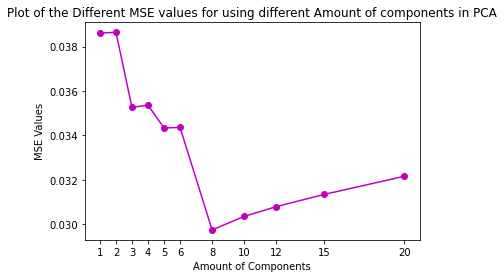

In [17]:
# your code here
k_list = [1,2,3,4,5,6,8,10,12,15,20]

# must always Scale before doing PCA
xtrain_scaled = StandardScaler().fit_transform(X_train)
xtest_scaled = StandardScaler().fit_transform(X_test)

mse_value = []

for k in k_list:
    pca_xtrain = PCA(n_components = k).fit(xtrain_scaled) #looping through k 
    xtrain_transform = pca_xtrain.transform(xtrain_scaled)
    
    lr = LinearRegression()
    cross = cross_validate(lr,xtrain_transform,y_train,scoring = "neg_mean_squared_error",cv = 10, return_train_score = True)
    mse_value.append(cross["test_score"].mean()*-1)


# find lowest mse_value & corresponding k
low = min(mse_value)
index = mse_value.index(low)
best_k = k_list[index]
#print(mse_value)
print(f"Here is the k value that gives the lowest mse value from the cross validation {best_k} with value of {low:.4f}")


plt.figure()
plt.plot(k_list,  mse_value, "om-")
plt.title("Plot of the Different MSE values for using different Amount of components in PCA")
plt.xlabel("Amount of Components")
plt.xticks(k_list)
plt.ylabel("MSE Values")

<div class='exercise-r'>
    

**3.3.2** Now let's compute the $R^2$ value on the testing data:
  - Fit the PCA transformation with n_components equals the best $k$ on the standardized **X_train**.
  - Apply the PCA transformation to the standardized **X_train** and the standardized **X_test**. 
  - Fit a linear regression model to the PCA-transformed components and report the  test $R^2$.
    
</div>

In [18]:
# your code here
xtest_scaled = StandardScaler().fit_transform(X_test)


pca_fit = PCA(n_components = 8).fit(xtrain_scaled)  # still fit on xtrain

#transform both test & train
xtest_transform = pca_fit.transform(xtest_scaled)
xtrain_transform = pca_fit.transform(xtrain_scaled)

lr = LinearRegression()
lr.fit(xtrain_transform, y_train)
y_pred = lr.predict(xtest_transform)
r2 = r2_score(y_test,y_pred)

print(f"Here is the test R^2 scored from PCA transformation and using Linear Regression {r2:.3f}")



Here is the test R^2 scored from PCA transformation and using Linear Regression 0.655


<div class='exercise-r'>

**3.4** Compare the $R^2$ value obtained from **3.2** and **3.3.2**. Interpret the result.
    
</div>

**your answer here**
From 3.2 using just a linear regression model, the R^2 score was 0.219. From 3.3.2 using scaling and PCA transformation with 8 components, the R^2 jumps up to 0.655. PCA is used to reduce the number or parameters by seeing which ones cause the most variance that describe the dataset. By removing extraneous parameters, the model using pca with 8 components is a better description of the data than just a linear regression using all of the parameters. 


<a id="part2q4"></a>

## <div class='exercise'><b> Question 4: Visualizing Transformed Data [10 pts]</b></div>

[Return to contents](#contents)

In this question, we will be using a dataset called "Better Life Index" adapted from [Organisation for Economic Co-operation and Development](https://stats.oecd.org/). The modified dataset contains 24 numerical variables and 1 categorical variable. The categorical variable `Country` is the name of the country. Some of the numerical variables include:

- `Dwellings without basic facilities`
- `Housing expenditure`
- `Rooms per person`
- `Household net adjusted disposable income`
- `Household net financial wealth`
- ...


**Load the dataset, and answer the following questions:**


**4.1** Standardize **X** and apply PCA transformation with n_components = 2 to your standardized data.

**4.2** Make a scatter plot for the transformed data, where the x-axis corresponds to the first principal component, and the y-axis corresponds to the second principal component. Label each point by its corresponding country name. Do you observe any pattern in the scatter plot?

**4.3** In Question 3, where we also used PCA, we had a training and a test set. Here we do not split the data. Explain why.

In [19]:
# Load the datasets
df = pd.read_csv("data/OECD_well-being.csv", index_col = 0)
country, X = df['Country'], df.drop(columns='Country').values
country.head()

0    Australia
1      Austria
2      Belgium
3       Canada
4        Chile
Name: Country, dtype: object

In [20]:
#plt.figure()
#plt.scatter(df['Student skills'], df['Country'])

<a id="part2q4solution"></a>
## Question 4: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>

**4.1** Standardize **X** and apply PCA transformation with n_components = 2 to your standardized data.
    
</div>


In [21]:
# your code here
x_scale = StandardScaler().fit_transform(X)
pca_fit = PCA(n_components = 2).fit(x_scale)  
x_transform = pca_fit.transform(x_scale)
x_transform.shape


(38, 2)

<div class='exercise-r'>

**4.2** Make a scatter plot for the transformed data, where the x-axis corresponds to the first principal component, and the y-axis corresponds to the second principal component. Label each point by its corresponding country name. Do you observe any pattern in the scatter plot?
    
</div>

Text(0, 0.5, 'Principal Component 2')

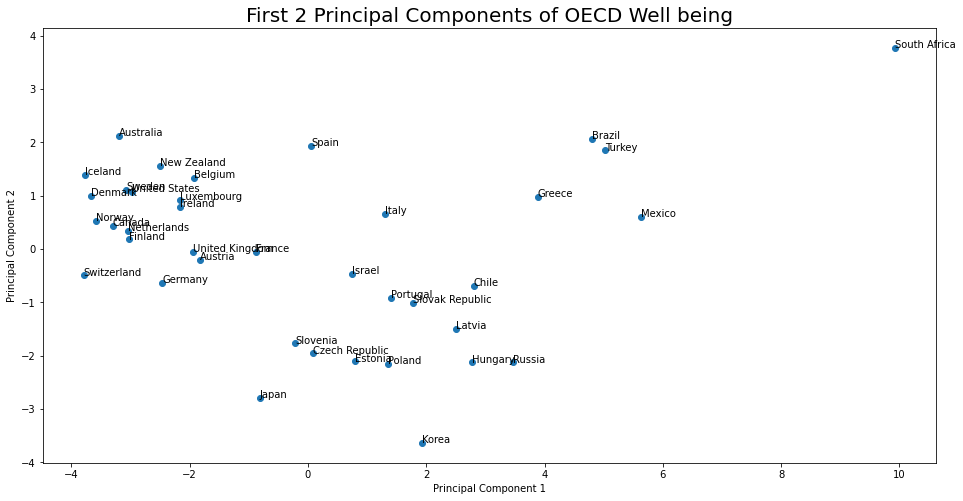

In [22]:
# your code here

comp1 = x_transform[:,0]
comp2 = x_transform[:,1]


plt.figure(figsize=(16,8))

plt.scatter(x_transform[:,0],x_transform[:,1])
for i, name in enumerate(country):
    plt.annotate(name, (x_transform[i,0], x_transform[i,1]))
plt.title('First 2 Principal Components of OECD Well being', fontsize=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


**INTERPRETATION:**

**your answer here**
I do not see any pattern from this graph. It is quite busy and countries of different continents are scattered. THe only thing I can see is there is some slight grouping towards the [-4,-2] part of component 1 and [-1,3] of component 2.

<div class='exercise-r'>

**4.3** In Question 3, where we also used PCA, we had a training and a test set. Here we do not split the data. Explain why.
    
</div>

**INTERPRETATION:**

**your answer here**
We do not split the data because in PCA we want to be able to see all the datapoints and predictors to see where the variances lie. PCA, in our case, is used as a visualization tool and to be able to see what components hold the most variance, which helps to describe the dataframe.